# Simulate only one atmospheric transmission
=======================================================================


- Sylvie Dagoret-Campagne
- affliliation : IJCLAB/IN2P3/CNRS
- creation date :  24 February 2020
- last verification : February 20th 2024

=======================================================================


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
import numpy as np

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [4]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(12,6)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

In [5]:
import sys
sys.path

['/Users/dagoret/MacOSX/GitHub/LSST/AtmosphericSimulation/libradtranpy/docs/notebooks/libradtranpy/visible',
 '/Users/dagoret/anaconda3/envs/conda_py310/lib/python310.zip',
 '/Users/dagoret/anaconda3/envs/conda_py310/lib/python3.10',
 '/Users/dagoret/anaconda3/envs/conda_py310/lib/python3.10/lib-dynload',
 '',
 '/Users/dagoret/anaconda3/envs/conda_py310/lib/python3.10/site-packages',
 '/Users/dagoret/MacOSX/GitHub/LSST/AtmosphericSimulation/AtmEmulator/src',
 '/Users/dagoret/MacOSX/GitHub/LSST/AtmosphericSimulation/FitDiffAtmo/src',
 '/Users/dagoret/MacOSX/GitHub/LSST/AtmosphericSimulation/libradtranpy/src',
 '/Users/dagoret/MacOSX/GitHub/LSST/AtmosphericSimulation/rubinsimphot/src']

In [6]:
from libradtranpy import libsimulateVisible

In [7]:
os.getenv('LIBRADTRANDIR')

'/Users/dagoret/MacOSX/External/libRadtran'

In [8]:
am=1.
pressure = 0. # use default value
pwv=4.0
aer=0
ozone=300.
cloudext=0

In [9]:
NBOBS=1

In [10]:
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBOBS)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange( NBOBS), alpha=1)

In [11]:
all_trans = []
for index in np.arange(NBOBS):

    wl,atm=libsimulateVisible.ProcessSimulation(am,pwv,ozone,pressure,aer_num=aer,
                                                      prof_str='us',proc_str='sa',cloudext=cloudext,altitude='LSST',FLAG_VERBOSE=False)
    all_trans.append(atm)

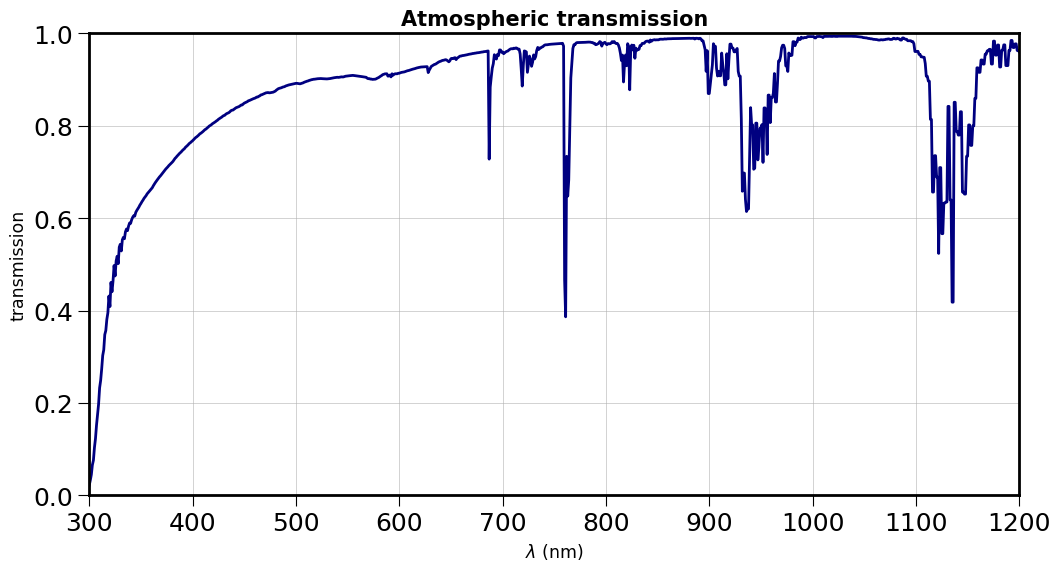

In [12]:
for index in np.arange(NBOBS):   
    plt.plot(wl,all_trans[index],'-',color=all_colors[index])
plt.xlim(300,1200)
plt.grid()
plt.title("Atmospheric transmission")
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("transmission")
plt.ylim(0.,1)
figname="onetransmission_lin.png"
plt.savefig(figname)

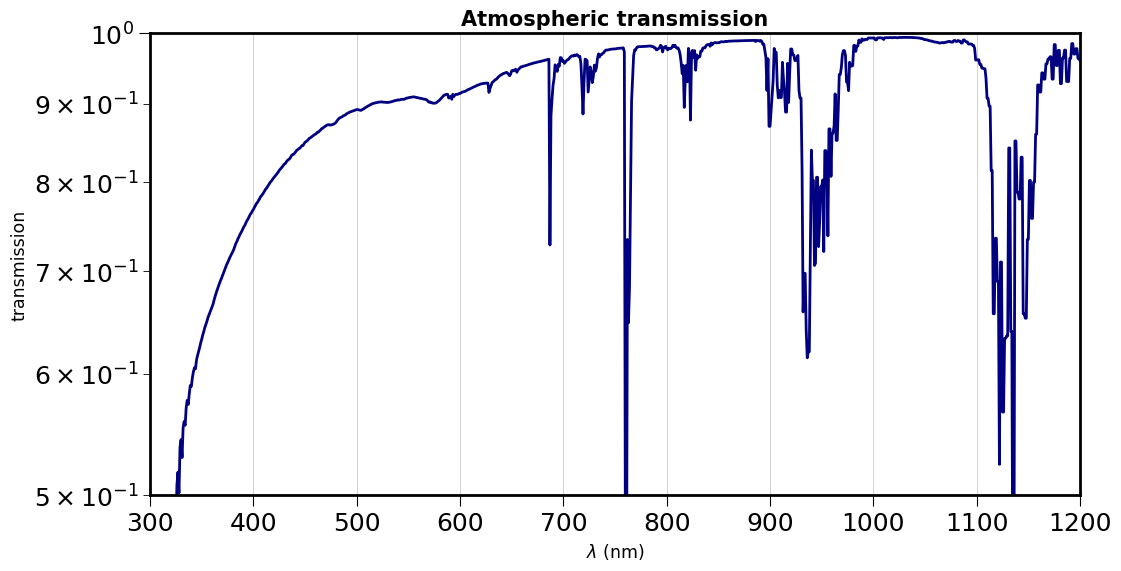

In [13]:
for index in np.arange(NBOBS):   
    plt.semilogy(wl,all_trans[index],'-',color=all_colors[index])
plt.xlim(300,1200)
plt.grid()
plt.title("Atmospheric transmission")
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("transmission")
plt.ylim(0.5,1)
figname="onetransmission_log.png"
plt.savefig(figname)